# E-tivity 2 (12/02/24 - 25/02/24)

* Name: Paul Trayers

* Student ID: 8907021

## Outline

This e-tivity is split into two parts. The first part <a href="#part1">**Stock Predicition**</a> is a group activity where you are tasked with predicting the stock market.

The second <a href="#part2">**Sentiment Analysis**</a> is an individual task, the problem is to predict if a film review is positive or negative.

### Guidelines

The e-tivity is split into five tasks. The first four are "group" excersises, in that you post the solutions to Tasks 1-4 to the Group Locker. This will allow the members of your group to send you feedback (via the forums) so you can improve your submission. The final task is an individual task and together with the other tasks, should be uploaded to Brightspace.

Marks will be deducted if task 5 is uploaded in contravention of instructions. Also if the the final submission is not a single notebook with tasks 1-5 and with correct identification or filename.


Grading guidelines: the grades for each task are additive, max 20. Weight [5/7]

**Task 1 [0-6]**: Complete with suitable preprocessing steps. There is no unique solution but you should justify the actions you are taking.

**Task 2 [0-4]**: Complete with suitable treatment of missing values. Again there maybe more than one solution, the important thing is to justify your actions.

**Tasks 3+4 [0-4]**: Create a suitable model with correct evaluation. Test for common DL issues.

**Task 5 [0-6]**: Completion of Task 5, using the layers outlined. The purpose of the task is to demonstrate that you can construct a valid model from scratch. Direct copy and paste from the web is not acceptable.

<a id='part1'></a>
## Stock Prediction

### Context

There is a small dataset of real stock prices for each working day from the end of 2015 to the end of 2019. There are four variables (with a time stamp), stock price, oil price, gold price and Euro to Dollar exchange. You need to predict the Stock price a day ahead from only the past values of each of the 4 variables.


### Tasks 1-4 (complete by Sunday 18/02/24)

These tasks are to be completed and uploaded to GitLab on which the other group members can comment. The forum activity will form part of the overall mark for the e-tivity.

# Load Dataset

Load dataset from Google Drive.

In [ ]:
# Mount my Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd /content/drive/MyDrive/cs5004/Etivities/Etivity2/
!ls -ail ./data/stock.csv

Mounted at /content/drive
/content/drive/MyDrive/cs5004/Etivities/Etivity2
236 -rw------- 1 root root 53284 Feb 14 00:13 ./data/stock.csv


In [ ]:
import pandas as pd

# Specify the path to your CSV file
file_path = './data/stock.csv'

# Load the dataset
data = pd.read_csv(file_path)
df = pd.DataFrame(data)

pd.set_option('display.max_rows', 8)
df.head(10)

,Date,Stock,Oil,EuroToDollar,Gold
0,2015-11-23,2089.409912,41.490002,0.9432,1124.7
1,2015-11-24,2084.419922,42.040001,0.9388,1131.6
2,2015-11-25,2089.300049,42.689999,0.9420,1128.4
3,2015-11-27,2088.820068,43.250000,0.9438,1114.5
...,...,...,...,...,...
6,2015-12-02,2101.709961,41.689999,0.9458,1112.4
7,2015-12-03,2080.709961,40.150002,0.9173,1120.6
8,2015-12-04,2051.239990,41.310001,0.9188,1143.2
9,2015-12-07,2090.419922,40.099998,0.9225,1134.3


# **Task 1: Data Preprocessing**

Explain any preprocessing steps you take including but not limited to reformatting and also how you have selected the training and test sets. The test set should be 20% of the whole.


## 1.1 Explore Dataset

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

# Convert 'Date' column to datetime if it's not already.
#df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index of the DataFrame.
#df.set_index('Date', inplace=True)

Show line plot for initial temporal view of features by years.

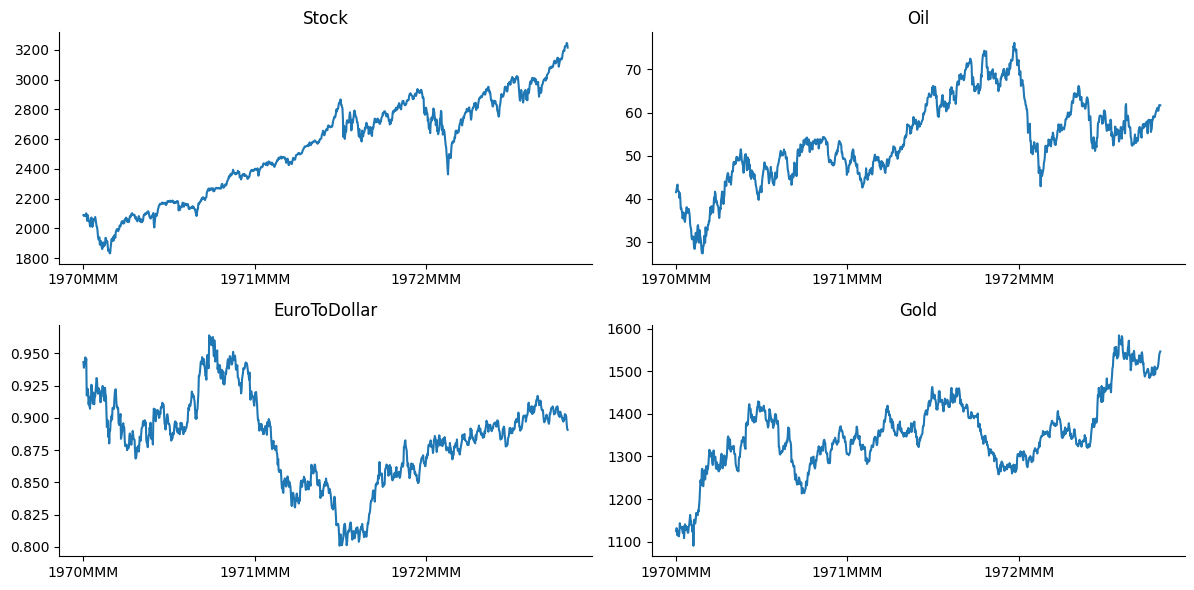

In [ ]:
# Define columns for which to create line plots, excluding 'Date'.
columns_to_plot = ['Stock', 'Oil', 'EuroToDollar', 'Gold']

# Determine the number of rows and columns for the subplot grid.
nrows = 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))  # Create a subplot for each column in a 2x2 grid.
axes = axes.flatten()  # Flatten the axes array for easy iteration.

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    df[column].plot(kind='line', ax=ax, title=column)
    # Show year on x-axis
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
    # Hide the top and right spines for each subplot.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Adjust the layout to prevent overlapping of plots
plt.tight_layout()
plt.show()

Plot box plot for initial view of feature distributions.

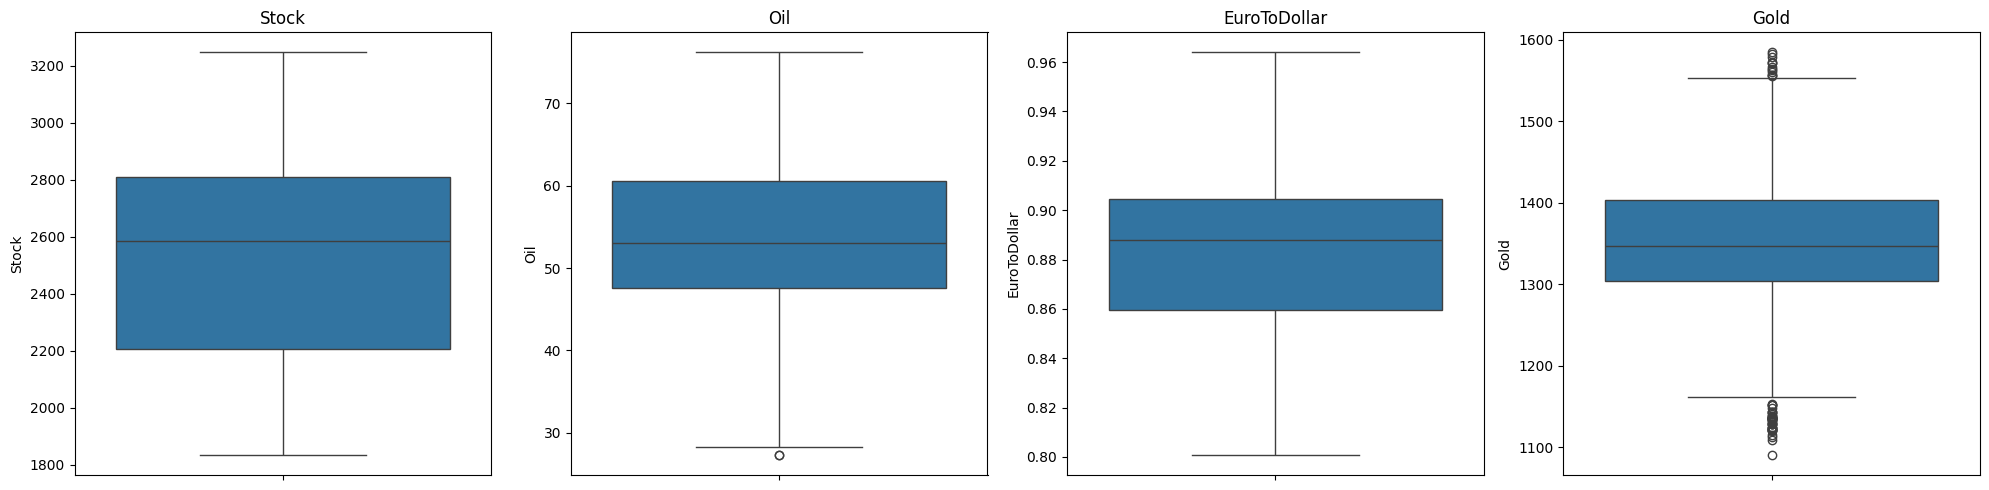

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math

# Creating box plots for each feature (exclusing Date)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Assuming 'df' might include a 'Date' column, we exclude it from the plot.
columns_to_plot = [column for column in df.columns if column != 'Date']

for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


## 1.2 Split Training / Test Data

Now we will split the data into training and test sets in an 80/20 split.


In [ ]:
# Calculate the split index
training_data_len = int(len(df) * 0.8)

# Splitting the data
n_features = 2 # Date and Stock
train_df = df.iloc[:training_data_len].iloc[:,:n_features]  # select n features from the dataset
test_df = df.iloc[training_data_len:].iloc[:,:n_features]

# We can print the first few rows of the training and test set to verify the split.
print("Training set:\n", train_df)
print("\nTest set:\n", test_df)

print("\nThere are "+ str(train_df.shape) + " observations in the training data")
print("There are "+ str(test_df.shape) + " observations in the test data")

# Output the split index and the corresponding date for verification
print(f"Split index at {training_data_len} corresponding to the date: {df.index[training_data_len]}")


Training set:
            Date        Stock
0    2015-11-23  2089.409912
1    2015-11-24  2084.419922
2    2015-11-25  2089.300049
3    2015-11-27  2088.820068
..          ...          ...
822  2019-03-04  2814.370117
823  2019-03-05  2794.409912
824  2019-03-06  2790.270020
825  2019-03-07  2766.530029

[826 rows x 2 columns]

Test set:
             Date        Stock
826   2019-03-08  2730.790039
827   2019-03-11  2747.610107
828   2019-03-12  2787.340088
829   2019-03-13  2799.780029
...          ...          ...
1029  2019-12-26  3227.199951
1030  2019-12-27  3247.229980
1031  2019-12-30  3240.090088
1032  2019-12-31  3215.179932

[207 rows x 2 columns]

There are (826, 2) observations in the training data
There are (207, 2) observations in the test data
Split index at 826 corresponding to the date: 826


 This code creates numpy array from the “Stock” price training values. The 1-dimensional array is then transformed into a 2-dimensional array, with the shape property showing the dataset_train array’s final shape.

In [ ]:
# Selecting Stock price values from training data to create numpy array dataset_train
dataset_train = train_df.Stock.values

# Reshaping 1D array to transform to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
# Show dataset_train shape (num_rows, num_columns)
dataset_train.shape

(826, 1)

## 1.3 Normalisation

There are a number of missing values in the data. Clean the data so that it is suitable for use with the NN. Bearing in mind that we want to retain the time coherency of the data as much as possible. Explain the steps you have taken.



Normalization is a crucial to enhancing the effectiveness and interpretability of the model. The MinMaxScaler scales the dataset from 0 to 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])

[[0.23202753]
 [0.22750499]
 [0.23192795]
 [0.23149294]
 [0.2334233 ]]


Normalise test data in the same way.

In [ ]:
# Selecting Open Price values
dataset_test = test_df.Stock.values
# print(dataset_test)
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# print(dataset_test)
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])  # unpack iterable, printing first 5 elements
print("\n", dataset_test.shape)

[0.] [0.03256926] [0.10949976] [0.13358763] [0.15411249]

 (207, 1)


# Task 2: Data Cleaning

Before handling, some features had missing values in the dataset. After applying forward fill (which propagates the last valid observation forward) and then backward fill (which fills in remaining NaN values by propagating the next valid observation backward), there are no missing values left in the dataset. This means all the NaNs have been successfully handled and filled.

In [ ]:
# Check for missing values before handling
print("Missing values before handling:")
print(df.isnull().sum())

# Handling missing values using forward fill (propagate last valid observation forward)
df.ffill(inplace=True)

# If forward fill was not sufficient (e.g., if the first values are missing), we can use backward fill
df.bfill(inplace=True)

# Check for missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
Date             0
Stock            0
Oil             10
EuroToDollar    12
Gold             0
dtype: int64

Missing values after handling:
Date            0
Stock           0
Oil             0
EuroToDollar    0
Gold            0
dtype: int64


## 2.1 Transform Timeseries

Divide the time-series data into X_train and y_train from the training set and X_test and y_test from the testing set. This is done to turn time series data into a supervised learning problem that can be utilized to train the model.

The loop generates input/output sequences of length 50 while iterating through the time series data. Using this method, we can forecast future values while taking into consideration the data’s temporal dependence on prior observations.

In [ ]:
# For training dataset
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
  X_train.append(scaled_train[i-50:i, 0])
  y_train.append(scaled_train[i, 0])
  if i <= 51:
    print(X_train)
    print(y_train)
    print()


[array([0.23202753, 0.22750499, 0.23192795, 0.23149294, 0.2334233 ,
       0.22615457, 0.24317534, 0.22414256, 0.19743327, 0.23294292,
       0.21750822, 0.20643299, 0.1944334 , 0.19383519, 0.16311084,
       0.17414989, 0.19313731, 0.21784367, 0.18798038, 0.16030126,
       0.1719747 , 0.18924008, 0.20856293, 0.20335158, 0.20586211,
       0.22108837, 0.20590747, 0.18561479, 0.16348246, 0.16160631,
       0.13768845, 0.10202468, 0.0840342 , 0.08558397, 0.09692208,
       0.0528205 , 0.07547857, 0.07547857, 0.05008339, 0.0387725 ,
       0.02543135, 0.03987819, 0.06605279, 0.04113799, 0.06264501,
       0.04696558, 0.05492312, 0.09384056, 0.092318  , 0.06676871])]
[0.07093788117239996]

[array([0.23202753, 0.22750499, 0.23192795, 0.23149294, 0.2334233 ,
       0.22615457, 0.24317534, 0.22414256, 0.19743327, 0.23294292,
       0.21750822, 0.20643299, 0.1944334 , 0.19383519, 0.16311084,
       0.17414989, 0.19313731, 0.21784367, 0.18798038, 0.16030126,
       0.1719747 , 0.18924008, 0.20

Transforming testing data

In [ ]:
# For testing data
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])

Convert to format suitable for input to an RNN. np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) transforms the X_train array, originally a 2-dimensional array of shape (samples, features), into a 3-dimensional array of shape (samples, time steps, features), where time steps denotes the number of time steps in the input sequence and features denotes the number of features in the input data. Size 1 is an additional dimension that serves as an indication that each time step only has a single feature.

The y_train array is transformed from a 1-dimensional array of shape (samples) into a 2-dimensional array of shape (samples, 1) by np.reshape(y_train, (y_train.shape[0], 1)), where each row represents the output value at a certain time step.

For training data.

In [ ]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)


X_train : (776, 50, 1) y_train : (776, 1)


For testing data.

In [ ]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)


X_test : (157, 50, 1) y_test : (157, 1)


# Task 3: Model Construction

Construct a RNN network that will predict the future value of Stock, one day/time interval in advance.

In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

## 3.1 RNN Model

Using the Keras API, this code creates a recurrent neural network (RNN) with four layers of basic RNNs and a dense output layer. It makes use of the tanh hyperbolic tangent activation function. To avoid overfitting, a dropout layer with a rate of 0.2 is introduced. It employs the optimizer as Adam, mean squared error as the loss function, and accuracy as the evaluation metric while compiling. With a batch size of 2, it fits the model to the training data for 20 epochs. The number of parameters in each layer and the overall number of parameters in the model are listed in a summary of the model architecture.

In [ ]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True,
						input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
								#decay=1e-6, deprecated
								momentum=0.9,
								nesterov=True),
				loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()


Epoch 1/20
388/388 [==============================] - 21s 33ms/step - loss: 0.0087
Epoch 2/20
388/388 [==============================] - 13s 33ms/step - loss: 0.0025
Epoch 3/20
388/388 [==============================] - 13s 33ms/step - loss: 0.0022
Epoch 4/20
388/388 [==============================] - 13s 34ms/step - loss: 0.0018
Epoch 5/20
388/388 [==============================] - 13s 34ms/step - loss: 0.0018
Epoch 6/20
388/388 [==============================] - 13s 32ms/step - loss: 0.0015
Epoch 7/20
388/388 [==============================] - 12s 32ms/step - loss: 0.0013
Epoch 8/20
388/388 [==============================] - 14s 35ms/step - loss: 0.0015
Epoch 9/20
388/388 [==============================] - 12s 32ms/step - loss: 0.0013
Epoch 10/20
388/388 [==============================] - 13s 33ms/step - loss: 0.0014
Epoch 11/20
388/388 [==============================] - 13s 33ms/step - loss: 0.0014
Epoch 12/20
388/388 [==============================] - 15s 38ms/step - loss: 0.0012
E

## 3.1 LTSM Model

In [ ]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
					return_sequences = True,
					input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train,
				y_train,
				batch_size = 1,
				epochs = 12)
regressorLSTM.summary()


Epoch 1/12
776/776 [==============================] - 28s 29ms/step - loss: 0.0048 - accuracy: 0.0039
Epoch 2/12
776/776 [==============================] - 18s 24ms/step - loss: 0.0017 - accuracy: 0.0039
Epoch 3/12
776/776 [==============================] - 19s 25ms/step - loss: 0.0015 - accuracy: 0.0039
Epoch 4/12
776/776 [==============================] - 19s 25ms/step - loss: 9.3822e-04 - accuracy: 0.0039
Epoch 5/12
776/776 [==============================] - 25s 32ms/step - loss: 9.4771e-04 - accuracy: 0.0039
Epoch 6/12
776/776 [==============================] - 18s 23ms/step - loss: 8.2080e-04 - accuracy: 0.0039
Epoch 7/12
776/776 [==============================] - 19s 25ms/step - loss: 8.5525e-04 - accuracy: 0.0039
Epoch 8/12
776/776 [==============================] - 19s 24ms/step - loss: 6.7327e-04 - accuracy: 0.0039
Epoch 9/12
776/776 [==============================] - 22s 29ms/step - loss: 7.1283e-04 - accuracy: 0.0039
Epoch 10/12
776/776 [==============================] - 20s

## 3.2 GRU Model

In [ ]:
#Initialising the model
regressorGRU = Sequential()

# GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50,
					return_sequences=True,
					input_shape=(X_train.shape[1],1),
					activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50,
					return_sequences=True,
					activation='tanh'))

regressorGRU.add(GRU(units=50,
					return_sequences=True,
					activation='tanh'))

regressorGRU.add(GRU(units=50,
					activation='tanh'))

# The output layer
regressorGRU.add(Dense(units=1,
					activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01,
								#decay=1e-7,
								momentum=0.9,
								nesterov=False),
					loss='mean_squared_error')

# Fitting the data
regressorGRU.fit(X_train,y_train,epochs=20,batch_size=1)
regressorGRU.summary()


Epoch 1/20
776/776 [==============================] - 48s 55ms/step - loss: 0.0087
Epoch 2/20
776/776 [==============================] - 38s 49ms/step - loss: 0.0025
Epoch 3/20
776/776 [==============================] - 37s 48ms/step - loss: 0.0023
Epoch 4/20
776/776 [==============================] - 35s 45ms/step - loss: 0.0020
Epoch 5/20
776/776 [==============================] - 36s 47ms/step - loss: 0.0019
Epoch 6/20
776/776 [==============================] - 38s 49ms/step - loss: 0.0017
Epoch 7/20
776/776 [==============================] - 35s 45ms/step - loss: 0.0017
Epoch 8/20
776/776 [==============================] - 36s 47ms/step - loss: 0.0017
Epoch 9/20
776/776 [==============================] - 36s 47ms/step - loss: 0.0016
Epoch 10/20
776/776 [==============================] - 36s 47ms/step - loss: 0.0016
Epoch 11/20
776/776 [==============================] - 36s 47ms/step - loss: 0.0017
Epoch 12/20
776/776 [==============================] - 36s 47ms/step - loss: 0.0017
E

# Task 4: test

Evaluate the model on the test set and display any change in accuracy over time, if any. Test for common issues found in deep learning models.


The X_test data is used to make predictions from all three models.

In [ ]:
print(X_test.shape)

# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)


(157, 50, 1)
5/5 [==============================] - 2s 22ms/step


The predicted values are transformed back from the normalized state to their original scale using the inverse_transform() function.

In [ ]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN)
y_LSTM_O = scaler.inverse_transform(y_LSTM)
y_GRU_O = scaler.inverse_transform(y_GRU)


(157,)
(157, 1)


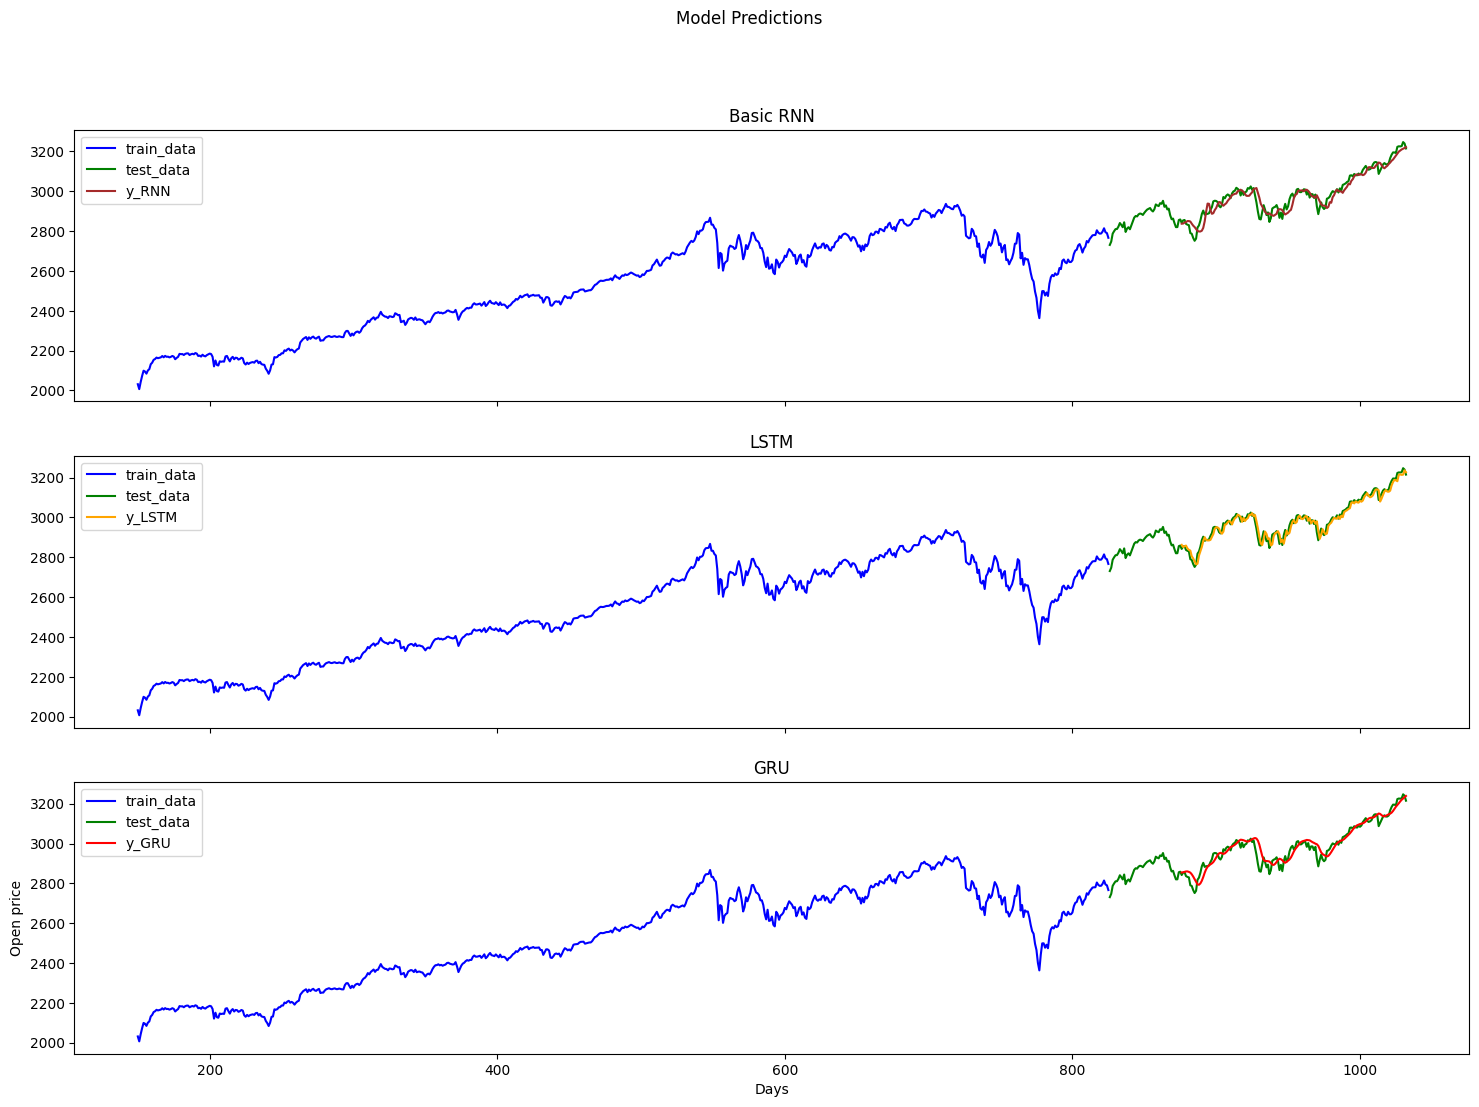

In [ ]:
print(test_df.index[50:].shape)
print(y_RNN.shape)

fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(train_df.index[150:], train_df.Stock[150:], label = "train_data", color = "b")
axs[0].plot(test_df.index, test_df.Stock, label = "test_data", color = "g")
axs[0].plot(test_df.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(train_df.index[150:], train_df.Stock[150:], label = "train_data", color = "b")
axs[1].plot(test_df.index, test_df.Stock, label = "test_data", color = "g")
axs[1].plot(test_df.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")

#Plot for GRU predictions
axs[2].plot(train_df.index[150:], train_df.Stock[150:], label = "train_data", color = "b")
axs[2].plot(test_df.index, test_df.Stock, label = "test_data", color = "g")
axs[2].plot(test_df.index[50:], y_GRU_O, label = "y_GRU", color = "red")
axs[2].legend()
axs[2].title.set_text("GRU")

plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()


In [ ]:
# We'll define a function that creates a 3-D array from the DataFrame for use in time series forecasting models.
# The function will create sequences of a specified number of time steps.
def create_sequences(dataframe, time_steps):
    array = dataframe.values
    sequences = []

    for i in range(len(array) - time_steps + 1):
        sequence = array[i:i + time_steps]
        sequences.append(sequence)

    # Convert the list of sequences to a 3-D NumPy array
    return np.array(sequences)

# Define the number of time steps for each sequence
time_steps = 10  # This is an example, adjust based on your specific requirements

# Create sequences from the DataFrame
sequences_3d = create_sequences(df, time_steps)

# Display the shape of the resulting 3-D array to verify
sequences_3d.shape

# Converts sf to 3-dimensional tensors
#[ of samples, # of time steps, # of features]
sequences_3d

array([[['2015-11-23', 2089.40991210938, 41.490002, 0.9432, 1124.7],
        ['2015-11-24', 2084.419921875, 42.040001, 0.9388, 1131.6],
        ['2015-11-25', 2089.30004882812, 42.689999, 0.942, 1128.4],
        ...,
        ['2015-12-03', 2080.7099609375, 40.150002, 0.9173, 1120.6],
        ['2015-12-04', 2051.23999023438, 41.310001, 0.9188, 1143.2],
        ['2015-12-07', 2090.419921875, 40.099998, 0.9225, 1134.3]],

       [['2015-11-24', 2084.419921875, 42.040001, 0.9388, 1131.6],
        ['2015-11-25', 2089.30004882812, 42.689999, 0.942, 1128.4],
        ['2015-11-27', 2088.82006835938, 43.25, 0.9438, 1114.5],
        ...,
        ['2015-12-04', 2051.23999023438, 41.310001, 0.9188, 1143.2],
        ['2015-12-07', 2090.419921875, 40.099998, 0.9225, 1134.3],
        ['2015-12-08', 2073.38989257812, 37.68, 0.9195, 1134.0]],

       [['2015-11-25', 2089.30004882812, 42.689999, 0.942, 1128.4],
        ['2015-11-27', 2088.82006835938, 43.25, 0.9438, 1114.5],
        ['2015-11-30', 2090.

The three dimensions are:

* Tensor: One tensor is a vector that enters the model
* Time Step: One-time step is one observation in the tensor.
* Feature: One feature is one observation at a time step.


In [ ]:
def ts_train_test(all_data, time_steps, for_periods):
    '''
    input:
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2018/12/31
      X_test:  data from 2019 -
    time_steps: # of the input time steps
    for_periods: # of the output time steps
    '''
    # create training and test set
    ts_train = all_data[:'2018'].iloc[:,0:1].values
    ts_test  = all_data['2019':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1):
        X_train.append(ts_train[i-time_steps:i,0])
        y_train.append(ts_train[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    # Preparing to create X_test
    inputs = pd.concat((all_data["Stock"][:'2018'], all_data["Stock"]['2019':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)

    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])

    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test

X_train, y_train, X_test = ts_train_test(df, 5, 1)
X_train.shape[0],X_train.shape[1]


In [ ]:
# Convert the 3-D shape of X_train to a data frame so we can see:
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0],X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see,y_train_see],axis=1)

# Convert the 3-D shape of X_test to a data frame so we can see:
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0],X_test.shape[1])))
pd.DataFrame(X_test_see)

print("There are " + str(X_train.shape[0]) + " samples in the training data")
print("There are " + str(X_test.shape[0]) + " samples in the test data")

NameError: name 'X_train' is not defined

In [ ]:
def ts_train_test(all_data,time_steps,for_periods):
    '''
    input:
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2018/12/31
      X_test:  data from 2019 -
    time_steps: # of the input time steps
    for_periods: # of the output time steps
    '''
    # create training and test set
    ts_train = all_data[:'2018'].iloc[:,0:1].values
    ts_test  = all_data['2019':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1):
        X_train.append(ts_train[i-time_steps:i,0])
        y_train.append(ts_train[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    # Preparing to create X_test
    inputs = pd.concat((all_data["Adj Close"][:'2018'], all_data["Adj Close"]['2019':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)

    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])

    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test

X_train, y_train, X_test = ts_train_test(all_data,5,2)
X_train.shape[0],X_train.shape[1]

In [ ]:
# First, we need to define a function that will create sequences suitable for time series forecasting.
# This function will create sequences of input data (X) and the corresponding output data (y).

def create_sequences(data, time_steps, for_periods):
    """
    Create sequences of time_steps length and sequences of for_periods (forecast length).

    :param data: The entire dataset as a numpy array.
    :param time_steps: The number of time steps for the input sequence.
    :param for_periods: The number of time steps to forecast.
    :return: X, y as numpy arrays.
    """
    X, y = [], []

    # Create sequences of data
    for i in range(time_steps, len(data) - for_periods):
        X.append(data[i - time_steps:i])
        y.append(data[i:i + for_periods])

    return np.array(X), np.array(y)

# Now, we use the function to create our train and test sets.
# For the sake of the example, let's continue with the artificial DataFrame we created earlier.

# Split the DataFrame into train and test sets based on the position in the index
split_index = 829
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# Convert DataFrames to numpy arrays
train_data = train_df.values
test_data = test_df.values

# Define the number of time steps for the input and periods to forecast
time_steps = 5  # Number of time steps in the input sequence
for_periods = 1  # Number of time steps to forecast

# Create sequences for training
X_train, y_train = create_sequences(train_data, time_steps, for_periods)

# Create sequences for testing
# We need to concatenate the end of the training data with the test data to form sequences
test_data_combined = np.concatenate((train_data[-time_steps:], test_data))
X_test, _ = create_sequences(test_data_combined, time_steps, for_periods)

X_train.shape, y_train.shape, X_test.shape


((823, 5, 4), (823, 1, 4), (203, 5, 4))

In [ ]:
# Convert the 3-D shape of X_train to a data frame so we can see:
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0],X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see,y_train_see],axis=1)

# Convert the 3-D shape of X_test to a data frame so we can see:
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0],X_test.shape[1])))
pd.DataFrame(X_test_see)

print("There are " + str(X_train.shape[0]) + " samples in the training data")
print("There are " + str(X_test.shape[0]) + " samples in the test data")

ValueError: cannot reshape array of size 16460 into shape (823,5)

In [ ]:
# Since X_train and y_train are 3-D arrays, we need to adapt the reshaping process to handle the features dimension correctly.

# Convert the 3-D shape of X_train to a 2-D DataFrame for visualization
# Flatten the time steps and features for X_train
X_train_flattened = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train_see = pd.DataFrame(X_train_flattened)

# Flatten the time steps and features for y_train
y_train_flattened = y_train.reshape(y_train.shape[0], y_train.shape[1] * y_train.shape[2])
y_train_see = pd.DataFrame(y_train_flattened)

# Concatenate X_train and y_train DataFrames for a comprehensive view
train_data_combined = pd.concat([X_train_see, y_train_see], axis=1)

# For X_test, since there's an issue creating samples, we'll check if it's not empty before reshaping
if X_test.shape[0] > 0:
    X_test_flattened = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
    X_test_see = pd.DataFrame(X_test_flattened)
else:
    X_test_see = pd.DataFrame()

# Output the combined DataFrame to see the input and target data side by side for training data
print(train_data_combined)

# Output the DataFrame for X_test to see the input data for testing
print(X_test_see)

# Print the number of samples in the training and test data
print("There are " + str(X_train.shape[0]) + " samples in the training data")
print("There are " + str(X_test.shape[0]) + " samples in the test data")


             0            1          2       3       4           5   \
0    2015-11-23  2089.409912  41.490002  0.9432  1124.7  2015-11-24   
1    2015-11-24  2084.419922  42.040001  0.9388  1131.6  2015-11-25   
2    2015-11-25  2089.300049  42.689999   0.942  1128.4  2015-11-27   
3    2015-11-27  2088.820068      43.25  0.9438  1114.5  2015-11-30   
4    2015-11-30  2090.949951      41.77  0.9468  1123.9  2015-12-01   
..          ...          ...        ...     ...     ...         ...   
818  2019-02-26  2792.360107  55.459999  0.8792  1387.9  2019-02-27   
819  2019-02-27       2787.5  55.950001  0.8795  1380.5  2019-02-28   
820  2019-02-28  2788.110107       57.0  0.8788  1374.0  2019-03-01   
821  2019-03-01  2798.219971  57.220001   0.879  1358.3  2019-03-04   
822  2019-03-04  2814.370117  55.830002  0.8828  1346.3  2019-03-05   

              6          7       8       9   ...          20           21  \
0    2084.419922  42.040001  0.9388  1131.6  ...  2015-11-30  2090.949

### Post (complete by Sunday 18/02/24)

Post your solution to Tasks 1-4 in notebook form. If you have not completed all the tasks then that is acceptable. The purpose is to get feedback from others in the group, so if you have only a basic outline then you may get ideas about how to proceed and also examples from others in your group.

No posts should reference Task 5.

### Respond (complete by Wednesday 21/02/24)

If you feel you can provide useful advise then respond to another member of the group through the appropriate forum. Responses should be respectful and offer some sort of advise. Try and avoid clogging the forums with support or thank you messages.

In reviewing others code you will discover different ways to tackle the same problem. It is acceptable to copy parts of others code. However whole scale copying from another notebook is not acceptable.

Grading guidelines for the forum posts: Weight [2/7]

**Beginning [0-8]:** Respectful posts of minor value. Significant number of posts without valuable contributions and/or without well-considered questions. Posts about task 5 in contravention of instructions.

**Developing [9-12]:** At least 1 post  exceeding Beginning level with respectful suggestion or thought provoking question. Most posts contain valuable contributions or well-considered questions.

**Advancing [13-16]:** At least 2 posts: equal to or exceeding Beginning level;  with respectful and sound contribution highlighting mistakes or alternative approaches.

**Accomplished [17-20]:** At least 3 posts: equal to or exceeding Accomplished level; with respectful contribution of significant value.

<a id='part2'></a>
## Sentiment Analysis


This task is a individual task and should **not** to be uploaded to the Group Locker. No posts should be given via the forums. Marks will be deducted if the instructions are not followed (see rubrics). This part should be uploaded directly to Brightpsace.

### Context

You have a model that predicts the sentiment of a film review (positive or negative) from the IMDB. There are two hyperparameters that format the data from IMDB: the maximum review length and the dictionary size. Below is a RNN model that predicts sentiment values.


### Task 5:  (completed by Sunday 25/02/24)

Keeping top_words, max_review_lenngth and the embedding_vector_length the same, change the model so that it uses attention only, i.e. there are no recurrent components. The only Keras layers (defined here https://www.tensorflow.org/api_docs/python/tf/keras/layers) that you allowed to use are:
- Input,
- Embedding,
- Dense,
- Any Attention (must be at leat one),
- TimeDistributed,
- Any Merging,
- Any Reshaping,
- Any Pooling,
- Dropout.

You need not use any of the layers (except attention) but you can use some more than once. Can you do at least as good as the RNN example?

**NB** There are many examples of using attention for sentiment analysis but we looking to see if you can construct a sensible model. The model will be delibrately restricted, so do not waste too much time achieving spectacular accuracy. Remember the rules of thumb that we discussed in the Introduction to DL module.


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import numpy as np

top_words = 100
(Rev_train, Sc_train), (Rev_test, Sc_test) = imdb.load_data(num_words=top_words)

max_review_length = 500
X_train = sequence.pad_sequences(Rev_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(Rev_test, maxlen=max_review_length)
print(X_train.shape)

In [ ]:
embedding_vector_length = 16
model_imdb = Sequential()
model_imdb.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model_imdb.add(Dropout(0.2))
model_imdb.add(LSTM(10))
model_imdb.add(Dropout(0.2))
model_imdb.add(Dense(1, activation='sigmoid'))
model_imdb.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_imdb.summary())
plot_model(model_imdb,show_shapes=True)


The history for the model above has been saved, as it takes a while to run. If you want to run it yourself then comment out the second line.


In [ ]:
nepoch = 150
#IMDB_history = model_imdb.fit(X_train,Sc_train,validation_data=(X_test,Sc_test),epochs=nepoch,batch_size=256)
IMDB_history=np.load('IMDBTrainhist.npy',allow_pickle='TRUE').item()
plt.plot(range(nepoch),IMDB_history['loss'],c='r')
plt.plot(range(nepoch),IMDB_history['val_loss'],c='b')
plt.plot()

In [ ]:
plt.plot(range(nepoch),IMDB_history['accuracy'],c='r')
plt.plot(range(nepoch),IMDB_history['val_accuracy'],c='b')
plt.plot()

### Final Submission (complete by Sunday 25/02/24)

Submit Tasks 1-5 in a single notebook this before the deadline on Sunday.


In [ ]:
## Add additional code cells to implememt the tasks stated above

## Reflection

There are no specific marks allocated for a reflection. However due consideration will be given if pertinent comments or valuable insights are made.